/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.45


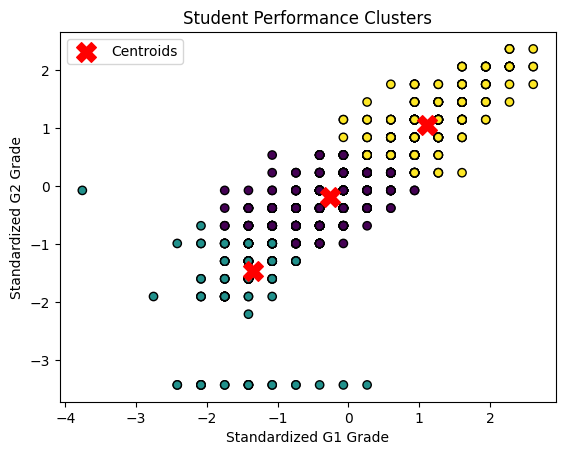

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the Student Performance dataset
# Assuming you have extracted the dataset and the CSV files are in the same directory
df_math = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

# Merge the two datasets (assuming the columns are the same)
df = pd.concat([df_math, df_por])

# Select relevant features for clustering
# You can modify this based on the available features in your dataset
features = df[['G1', 'G2', 'G3']]  # Grades in terms of periods

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-means clustering
num_clusters = 3  # You can choose the number of clusters based on domain knowledge or use techniques like the elbow method
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyze the performance of the implemented model
silhouette_avg = silhouette_score(features_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Visualize the clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['Cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Standardized G1 Grade')
plt.ylabel('Standardized G2 Grade')
plt.title('Student Performance Clusters')
plt.legend()
plt.show()
